In [ ]:
library(tidyverse)
library(readxl)
options(repr.plot.width = 5, repr.plot.height = 5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 306

## Homework 6: Importing data

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Scraping with `rvest` (2.5 points)

Use the `rvest` package to answer the following questions.

In [ ]:
library(rvest)


Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding




**(a)** [This web page](https://datatables.net/examples/data_sources/dom.html) has a table that records the name, position, office, age, start date, and salary of every employee in a company. Scrape this table and remove the last row. Save the table as `df` and print the LAST 6 rows. *(1 point)*

**HINT:** After reading in the above web page with `read_html()`, one way to scrape the table is to use `html_element("table")` followed by `html_table()`. You can use `tail()` to print the last several rows.

In [ ]:
#YOUR SOLUTION HERE

In [ ]:
#YOUR SOLUTION HERE
table <- read_html("https://datatables.net/examples/data_sources/dom.html")

df <- table %>%
  html_element("table") %>%
  html_table() %>%
  filter(row_number() <= n()-1)

tail(df)

Name,Position,Office,Age,Start date,Salary
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Hermione Butler,Regional Director,London,47,2011-03-21,"$356,250"
Lael Greer,Systems Administrator,London,21,2009-02-27,"$103,500"
Jonas Alexander,Developer,San Francisco,30,2010-07-14,"$86,500"
Shad Decker,Regional Director,Edinburgh,51,2008-11-13,"$183,000"
Michael Bruce,Javascript Developer,Singapore,29,2011-06-27,"$183,000"
Donna Snider,Customer Support,New York,27,2011-01-25,"$112,000"


**(b)** Create a scatterplot to check the relationship between `Age` and `Salary`. Note that they are stored as characters in `df`, and the values in `Salary` contain special characters `$` and `,`. You need to remove `$` and `,` from `Salary` then convert both `Age` and `Salary` to numeric. *(1.5 points)*

**HINT:** `as.numeric()` can convert a character variable to numeric. You may use `gsub()` to replace specific characters in strings. See examples below.

In [ ]:
# example for as.numeric()
x <- c("-0.1", " 2.7 ", "3")
print(x)
is.numeric(x) # check whether x is numeric

y <- as.numeric(x)
print(y)
is.numeric(y) # check whether y is numeric


[1] "-0.1"  " 2.7 " "3"    


[1] FALSE

[1] -0.1  2.7  3.0


[1] TRUE

In [ ]:
# example for gsub()
example <- 'This_is_an!example.'
print(example)
remove <- gsub('[\\_!]', '', example) # remove _ and ! from example
print(remove)

[1] "This_is_an!example."
[1] "Thisisanexample."


In [ ]:
#YOUR SOLUTION HERE

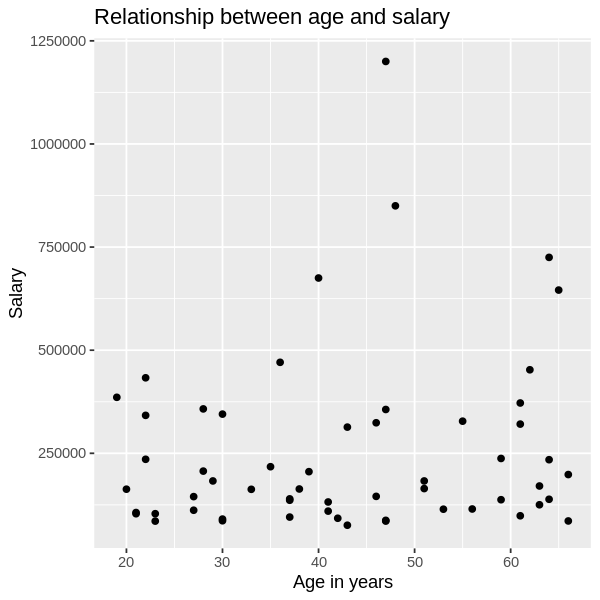

In [ ]:
#YOUR SOLUTION HERE

df$Salary <- as.numeric(gsub('[\\$,]', '', df$Salary))
df$Age <- as.numeric(df$Age)

df %>%
  ggplot(aes(x = Age, y = Salary)) +
  geom_point() +
  labs(title = "Relationship between age and salary",
       x = "Age in years", y = "Salary")

## Problem 2: Formula One Race Data (2.5 points)
Formula One (more commonly known as Formula 1 or F1) is the highest class of international racing for open-wheel single-seater formula racing cars sanctioned by the Fédération Internationale de l'Automobile (FIA). The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950.

The dataset `F1_Race_Data.xlsx` contains data from 1950 all the way through the 2017 season. We will use three tables in this problems:

*   `drivers`: Containing personal infomation of F1 driver, with primary key `driverId`
*   `results`: Containing the results in each race, with primary key `resultId`
*   `races`: Containing the location and time for each grand prix, with primary key `raceId`.

**(a)**
Import three tables from dataset and named them `drivers`, `races`, and `results`, respectively. Load the **first 10 columns only** for the `results` table. Print the column names of three tables. *(0.5 pt)*

In [ ]:
# YOUR SOLUTION HERE

drivers = read_excel("F1_Race_Data.xlsx", sheet = "drivers")
races = read_excel("F1_Race_Data.xlsx", sheet = "races")
results = read_excel("F1_Race_Data.xlsx", sheet = "results", range = cell_cols(c(1, 10)))

colnames(drivers)
colnames(races)
colnames(results)

[1] "driverId"    "driverRef"   "number"      "code"        "forename"   
[6] "surname"     "dob"         "nationality" "url"

[1] "raceId"    "year"      "round"     "circuitId" "name"      "date"     
[7] "time"      "url"

[1] "resultId"      "raceId"        "driverId"      "constructorId"
 [5] "number"        "grid"          "position"      "positionText" 
 [9] "positionOrder" "points"

**(b)** Find drivers who win the first place (earning 25 points) for the all Grand Prixs in 2016. The output table should includes: `race_name`, `race_date`, `forename`, `surname`, and `start_position`, in the order of date of the race. *(1 pt)*

**Hint**: `grid` is the start position for race.

In [ ]:
# YOUR SOLUTION HERE

output_df <- races %>%
    filter(year == 2016) %>%
    inner_join(results, by = "raceId") %>%
    inner_join(drivers, by = "driverId") %>%
    filter(position == 1) %>%
    select(c("name", "date", "forename", "surname", "grid"))
colnames(output_df) = c("race_name", "race_date", "forename", "surname", "start_position")
output_df

race_name,race_date,forename,surname,start_position
<chr>,<dttm>,<chr>,<chr>,<dbl>
Australian Grand Prix,2016-03-20,Nico,Rosberg,2
Bahrain Grand Prix,2016-04-03,Nico,Rosberg,2
Chinese Grand Prix,2016-04-17,Nico,Rosberg,1
Russian Grand Prix,2016-05-01,Nico,Rosberg,1
Spanish Grand Prix,2016-05-15,Max,Verstappen,4
Monaco Grand Prix,2016-05-29,Lewis,Hamilton,3
Canadian Grand Prix,2016-06-12,Lewis,Hamilton,1
European Grand Prix,2016-06-19,Nico,Rosberg,1
Austrian Grand Prix,2016-07-03,Lewis,Hamilton,1


**(c)** Generate a plot of the cummulative points of top 5 drivers in 2016. *(1 pt)*

**Hint**: You may want to use `cumsum()` function.

Selecting by cum_points


# A tibble: 5 × 3
  round code  cum_points
  <dbl> <chr>      <dbl>
1    21 ROS          385
2    21 HAM          380
3    21 RIC          256
4    21 VET          212
5    21 VER          204


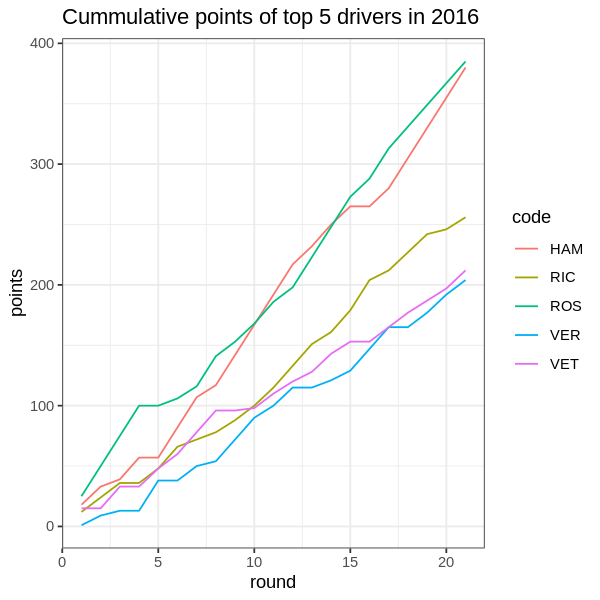

In [ ]:
# YOUR SOLUTION HERE

rcp_df <- races %>%
    filter(year == 2016) %>%
    inner_join(results, by = "raceId") %>%
    inner_join(drivers, by = "driverId") %>%
    group_by(driverId) %>%
    mutate(cum_points = cumsum(points)) %>%
    ungroup() %>%
    select(c("round", "code", "cum_points"))

rcp_df %>%
    group_by(code) %>%
    arrange(desc(cum_points)) %>%
    slice(1) %>%
    ungroup() %>%
    arrange(desc(cum_points)) %>%
    top_n(5) %>% print

# Top 5 drivers are ROS, HAM, RIC, VET, VER

rcp_df %>%
    filter(code %in% c("ROS", "HAM", "RIC", "VET", "VER")) %>%
    ggplot(aes(x = round, y = cum_points, color=code)) +
    geom_line() +
    labs(x = "round", y = "points") +
    ggtitle("Cummulative points of top 5 drivers in 2016") +
    theme_bw()